In [1]:
!pip install datasets transformers
!pip install fvcore
!pip install -U zetascale

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.9 

In [1]:
!apt-get install git-lfs
!git lfs install
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datasets/allenai/c4
%cd c4
!git lfs pull --include "en/c4-train.00000-of-01024.json.gz"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Git LFS initialized.
Cloning into 'c4'...
remote: Enumerating objects: 87108, done.
remote: Total 87108 (delta 0), reused 0 (delta 0), pack-reused 87108 (from 1)
Receiving objects: 100% (87108/87108), 12.30 MiB | 10.08 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (69221/69221), done.
/content/c4


In [2]:
from datasets import load_dataset

from transformers import T5TokenizerFast, T5Tokenizer

import gzip
import json

def load_json_gz(filepath):
    with gzip.open(filepath, 'rb') as f:
        for line in f:
            yield json.loads(line)

# Load the small subset you downloaded
dataset_path = 'en/c4-train.00000-of-01024.json.gz'
data = list(load_json_gz(dataset_path))

# Preview a few examples
print(data[:2])

# Load the fast version of the T5 tokenizer
#tokenizer = T5TokenizerFast.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained('t5-small', use_fast=True)
# Load the C4 dataset
tokenized_data = [tokenizer.encode(d['text'], return_tensors='pt') for d in data[:10]]

#tokenized_data.set_format(type="torch", columns=["input_ids"])

[{'text': 'Beginners BBQ Class Taking Place in Missoula!\nDo you want to get better at making delicious BBQ? You will have the opportunity, put this on your calendar now. Thursday, September 22nd join World Class BBQ Champion, Tony Balay from Lonestar Smoke Rangers. He will be teaching a beginner level class for everyone who wants to get better with their culinary skills.\nHe will teach you everything you need to know to compete in a KCBS BBQ competition, including techniques, recipes, timelines, meat selection and trimming, plus smoker and fire information.\nThe cost to be in the class is $35 per person, and for spectators it is free. Included in the cost will be either a t-shirt or apron and you will be tasting samples of each meat that is prepared.', 'timestamp': '2019-04-25T12:57:54Z', 'url': 'https://klyq.com/beginners-bbq-class-taking-place-in-missoula/'}, {'text': 'Discussion in \'Mac OS X Lion (10.7)\' started by axboi87, Jan 20, 2012.\nI\'ve got a 500gb internal drive and a 24

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Energy for expert  0 38.075
Flops for expert  0 15.52094208
Energy for expert  1 29.68
Flops for expert  1 15.52094208
Energy for expert  2 29.38
Flops for expert  2 15.52094208
Energy for expert  3 41.18
Flops for expert  3 15.52094208
Energy for expert  4 49.98
Flops for expert  4 15.52094208
Energy for expert  5 33.980000000000004
Flops for expert  5 15.52094208


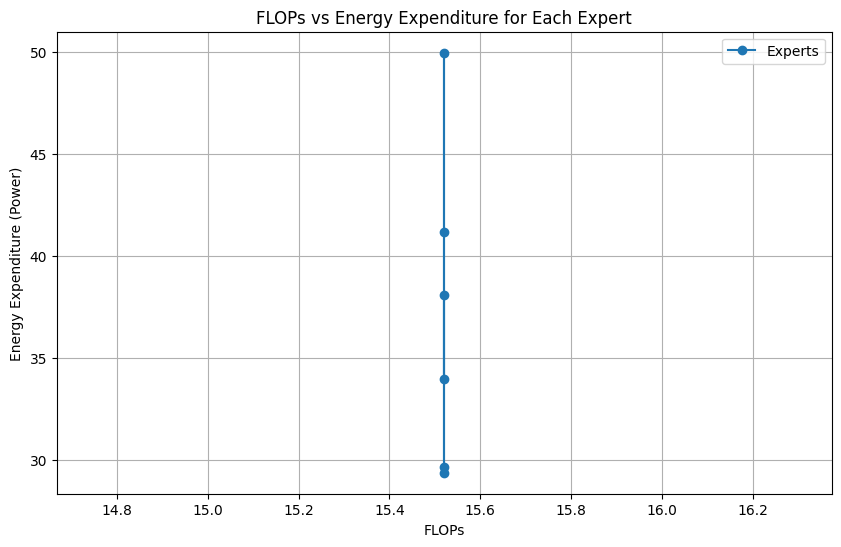

Epoch 1/5, Loss: 11.016951560974121
Energy for expert  0 45.98
Flops for expert  0 15.52094208
Energy for expert  1 37.81
Flops for expert  1 15.52094208
Energy for expert  2 37.98
Flops for expert  2 15.52094208
Energy for expert  3 37.51
Flops for expert  3 15.52094208
Energy for expert  4 37.69
Flops for expert  4 15.52094208
Energy for expert  5 39.53
Flops for expert  5 15.52094208


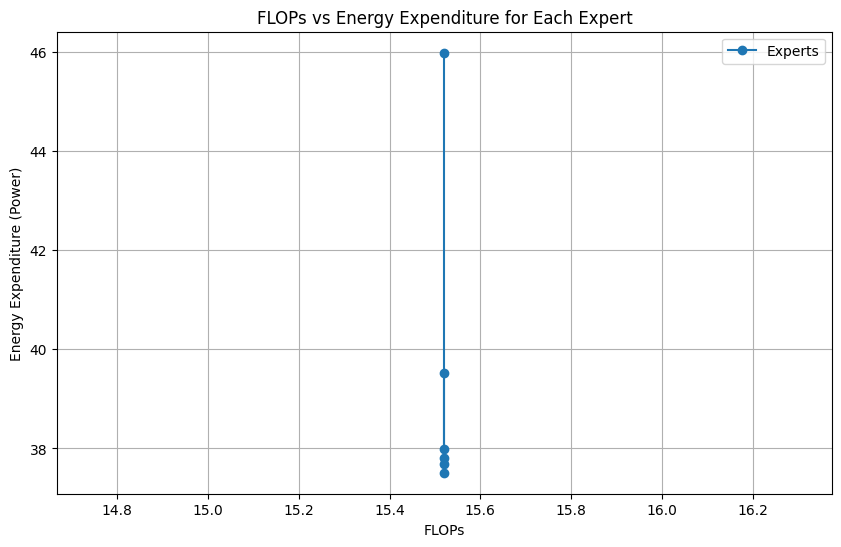

Epoch 2/5, Loss: 26.11447525024414
Energy for expert  0 50.31
Flops for expert  0 15.52094208
Energy for expert  1 43.845
Flops for expert  1 15.52094208
Energy for expert  2 41.7
Flops for expert  2 15.52094208
Energy for expert  3 54.82
Flops for expert  3 15.52094208
Energy for expert  4 46.0
Flops for expert  4 15.52094208


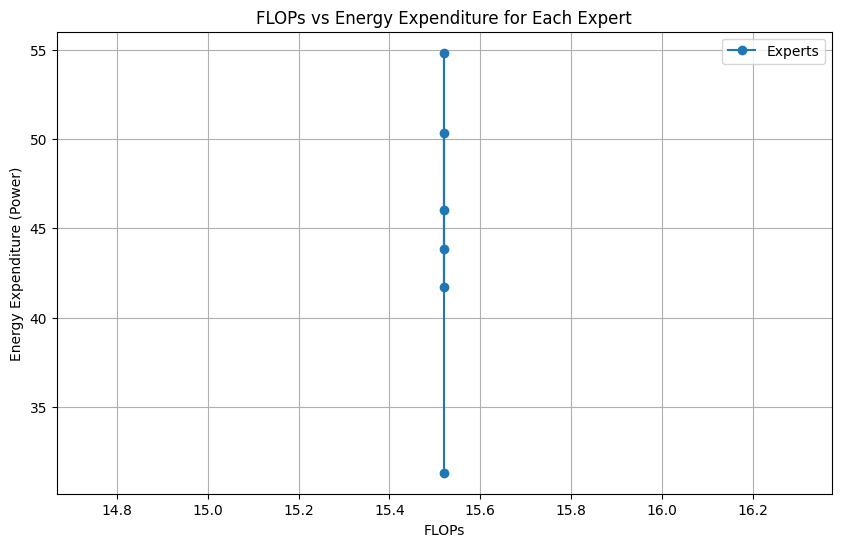

Epoch 3/5, Loss: 24.516475677490234
Energy for expert  0 64.57
Flops for expert  0 15.52094208
Energy for expert  1 37.31
Flops for expert  1 15.52094208
Energy for expert  2 37.69
Flops for expert  2 15.52094208
Energy for expert  3 37.39
Flops for expert  3 15.52094208
Energy for expert  4 50.34
Flops for expert  4 15.52094208
Energy for expert  5 46.93
Flops for expert  5 15.52094208


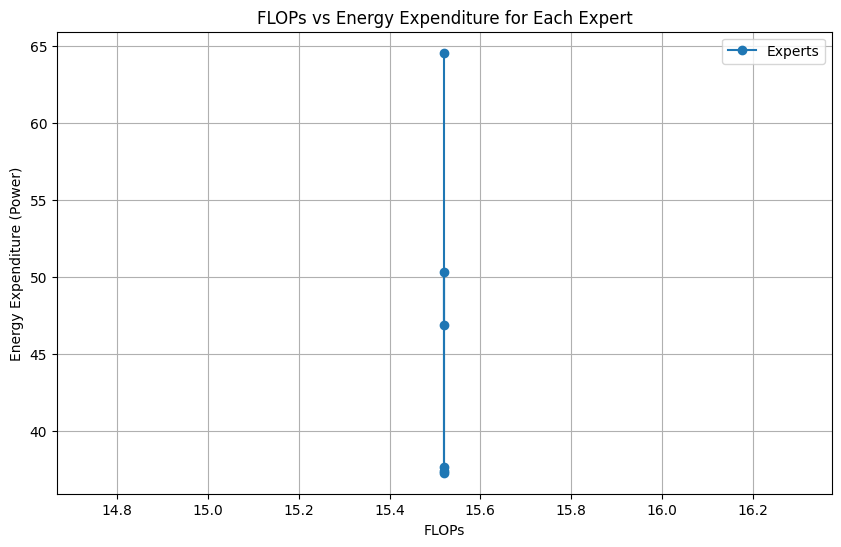

Epoch 4/5, Loss: 22.262773513793945
Energy for expert  0 37.31
Flops for expert  0 15.52094208
Energy for expert  1 37.49
Flops for expert  1 15.52094208
Energy for expert  2 57.37
Flops for expert  2 15.52094208
Energy for expert  3 52.379999999999995
Flops for expert  3 15.52094208
Energy for expert  4 37.61
Flops for expert  4 15.52094208
Energy for expert  5 37.61
Flops for expert  5 15.52094208


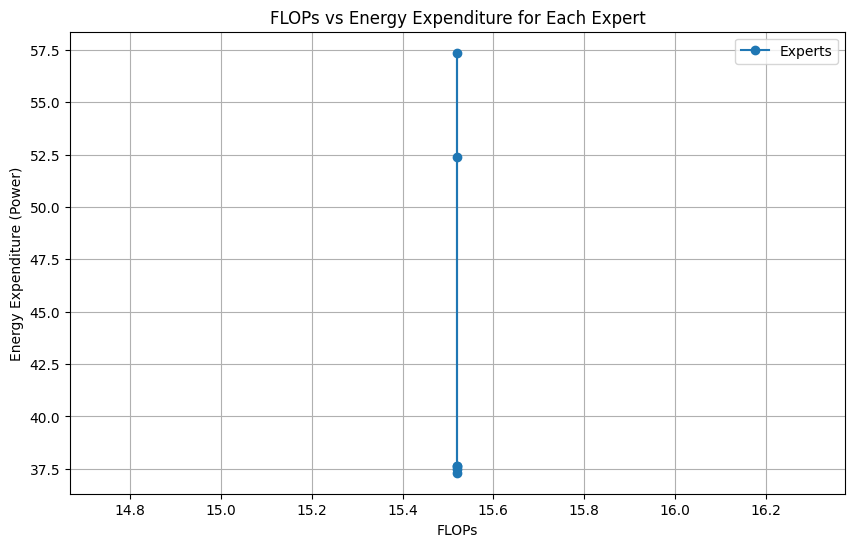

Epoch 5/5, Loss: 19.842453002929688


In [12]:
import torch
import torch.nn.functional as F
from torch import Tensor, nn
from zeta.nn import FeedForward, MultiQueryAttention
import torch.optim as optim
from torch.utils.data import DataLoader
import subprocess
import time
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from fvcore.nn import FlopCountAnalysis, flop_count

class DepthGate(nn.Module):
    def __init__(self, dim: int, max_depth: int):
        super().__init__()
        self.dim = dim
        self.max_depth = max_depth
        self.gate = nn.Linear(dim, max_depth)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        gate_scores = F.softmax(self.gate(x), dim=-1)
        return gate_scores

class TransformerLayer(nn.Module):
    def __init__(self, dim: int, num_heads: int, ff_hidden_dim: int):
        super().__init__()
        self.attention = nn.MultiheadAttention(dim, num_heads)
        self.feed_forward = nn.Sequential(
            nn.Linear(dim, ff_hidden_dim),
            nn.ReLU(),
            nn.Linear(ff_hidden_dim, dim)
        )
        self.norm1 = nn.LayerNorm(dim)
        self.norm2 = nn.LayerNorm(dim)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        attn_output, _ = self.attention(x, x, x)
        x = self.norm1(x + attn_output)
        ff_output = self.feed_forward(x)
        x = self.norm2(x + ff_output)
        return x

class MixtureOfDepthsTransformer(nn.Module):
    def __init__(self, num_tokens: int, dim: int, max_depth: int, num_heads: int, ff_hidden_dim: int, top_k: int):
        super().__init__()
        self.embedding = nn.Embedding(num_tokens, dim)
        self.max_depth = max_depth
        self.top_k = top_k
        self.depth_gate = DepthGate(dim, max_depth)
        self.layers = nn.ModuleList([TransformerLayer(dim, num_heads, ff_hidden_dim) for _ in range(max_depth)])
        self.fc_out = nn.Linear(dim, num_tokens)
        self.dim=dim
        self.flops_per_expert = []
        self.energy_per_expert = []
    def get_gpu_power(self):
        # Use nvidia-smi to get the current power draw (in watts)
        try:
            power_info = subprocess.check_output(['nvidia-smi', '--query-gpu=power.draw', '--format=csv,noheader,nounits'])
            power_draw = float(power_info.strip())  # Power in watts (W)
            return power_draw
        except Exception as e:
            print("Error getting GPU power:", e)
            return 0
    def plot_flops_vs_energy(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.flops_per_expert, self.energy_per_expert, 'o-', label="Experts")
        plt.xlabel("FLOPs")
        plt.ylabel("Energy Expenditure (Power)")
        plt.title("FLOPs vs Energy Expenditure for Each Expert")
        plt.legend()
        plt.grid(True)
        plt.show()


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        #print(x)
        # for i in range(x.size(0)):
        #      input_text = tokenizer.decode(inputs[i].tolist(), skip_special_tokens=True)
        #      print(f"Input Text: {input_text}")
        x = self.embedding(x)

        gate_scores = self.depth_gate(x)  # Shape: (batch_size, seq_len, max_depth)
        batch_size, seq_len, _ = x.size()

        # Initialize output tensor
        output = torch.zeros_like(x)
        # mask_total = torch.zeros(batch_size, seq_len, device=x.device)
        mask_total = torch.zeros(batch_size, seq_len, dtype=torch.bool, device=x.device)  # Use boolean mask
        all_tokens = x.clone()

        self.flops_per_expert.clear()
        self.energy_per_expert.clear()


        # Iterate through each depth (layer)
        for i in range(self.max_depth):
            # Get the top-K tokens for the current depth layer
            weights = gate_scores[:, :, i].unsqueeze(-1).expand(-1, -1, self.dim)
            weighted_scores = all_tokens*weights
            masked_scores = weighted_scores * (~mask_total).float().unsqueeze(-1)
            top_k_values, top_k_indices = masked_scores.topk(self.top_k, dim=-1, largest=True, sorted=False)  # Shape: (batch_size, seq_len, top_k)

            # Create a mask for top-K indices
            #mask = torch.zeros(batch_size, seq_len,  device=x.device)
            mask = torch.zeros(batch_size, seq_len, dtype=torch.bool, device=x.device)
            for b in range(batch_size):
                for s in range(seq_len):
                    mask[b, s] = torch.any(top_k_indices[b, s] == i)
            mask_total = mask_total | mask

            #mask = mask.unsqueeze(-1).expand(-1, -1, self.dim)
            masked_x = x * mask.unsqueeze(-1)
            #top_k_weights = gate_scores[:, :, i].unsqueeze(-1).expand(-1, -1, self.dim)
            #masked_x = x * mask
            weighted_x = masked_x * masked_scores
            initial_power = self.get_gpu_power()

            layer_output = self.layers[i](weighted_x)
            flops,_ = flop_count(self.layers[i],(weighted_x,))
            expert_flops = sum(flops.values())
            initial_power = self.get_gpu_power()
            layer_output = self.layers[i](weighted_x)
            final_power = self.get_gpu_power()
            avg_power = (initial_power + final_power) / 2
            print("Energy for expert ", i, avg_power)
            print("Flops for expert ", i, expert_flops)
            self.flops_per_expert.append(expert_flops)
            self.energy_per_expert.append(avg_power)
            output += layer_output
            #output = layer_output + x * (1 - mask)
            #x = output
            x = output * (~mask_total).unsqueeze(-1)
        self.plot_flops_vs_energy()
        return self.fc_out(output)


# Example usage

# Create DataLoader with custom collate_fn
def collate_fn(batch):
    input_ids = [item[0] for item in batch]
    max_length = max(seq.size(0) for seq in input_ids)
    padded_inputs = torch.stack([
        torch.cat([seq, torch.full((max_length - seq.size(0),), tokenizer.pad_token_id)])
        if seq.size(0) < max_length else seq[:max_length]
        for seq in input_ids
    ], dim=0)
    return {'input_ids': padded_inputs}

# Create DataLoader
dataloader = DataLoader(tokenized_data, batch_size=32, shuffle=True, collate_fn=collate_fn)


num_tokens = tokenizer.vocab_size
model = MixtureOfDepthsTransformer(num_tokens=num_tokens, dim=512, max_depth=6, num_heads=8, ff_hidden_dim=2048,top_k=5)


# Loss, optimizer, and training loop
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in dataloader:
        inputs = batch['input_ids'].to(device)
        #print(inputs.shape)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(inputs)

        # The model's output is (batch_size, seq_length, num_tokens)
        # We need to shift targets for next-token prediction (e.g., language modeling)
        logits = outputs[:, :-1, :].contiguous()
        targets = inputs[:, 1:].contiguous()

        loss = criterion(logits.view(-1, num_tokens), targets.view(-1))

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        # Update total loss
        total_loss += loss.item()

        # for i in range(inputs.size(0)):
        #     input_text = tokenizer.decode(inputs[i].tolist(), skip_special_tokens=True)
        #     #print(f"Input Text: {input_text}")

        #     # Extract the most likely token indices for the output
        #     top_token_indices = outputs[i].argmax(dim=-1)  # Shape: [seq_length]
        #     output_text = tokenizer.decode(top_token_indices.tolist(), skip_special_tokens=True)
        #     #print(f"Output Text: {output_text}")

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss/len(dataloader)}")

    # Step the learning rate scheduler, if any
    scheduler.step()